### Шамсутдинов Рустам БВТ2201
### Практическая работа 8

#### Задание 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f


x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])


n = len(x)

In [2]:
# Задание 1: Вычисляем b0 и b1 по Формуле 2
sum_x = np.sum(x)  # Сумма всех значений x
sum_y = np.sum(y)  # Сумма всех значений y
sum_xy = np.sum(x * y)  # Сумма произведений x и y
sum_x2 = np.sum(x ** 2)  # Сумма квадратов x

b0 = (sum_y * sum_x2 - (sum_xy * sum_x)) / (n*sum_x2 - (sum_x * sum_x))  # Формула 1
b1 = (sum_y * sum_x - (n*sum_xy)) / (sum_x * sum_x - (n * sum_x2)) # Формула 2

# Вычисляем коэффициент корреляции r
x_mean = np.mean(x)
y_mean = np.mean(y)

# Выборочные дисперсии
Sx_2 = np.sum((x - x_mean)**2) / n
Sy_2 = np.sum((y- y_mean)**2) / n

Sx = np.sqrt(Sx_2)
Sy = np.sqrt(Sy_2)

r = b1 * (Sx/Sy) # Формула 3

print("Задача 1: Коэффициенты")
print(f"b0 (свободный член): {b0:.4f}")
print(f"b1 (угол наклон): {b1:.4f}")
print(f"Коэффициент корреляции (r): {r:.4f}")

Задача 1: Коэффициенты
b0 (свободный член): 1.0600
b1 (угол наклон): 0.9927
Коэффициент корреляции (r): 0.9988


#### Задание 2

In [3]:
# Задание 2: Вычисление D1 (дисперсия)
f_x = b0 + b1 * x # уравнение линейной регрессии

D1 = np.sum((y - f_x) ** 2) / (n - 2)

print(f"\nЗадание 2: Дисперсия (D1): {D1:.4f}")


Задание 2: Дисперсия (D1): 0.0240


#### Задание 3

In [ ]:
# Задание 3: Критерий Фишера
n_for_S2 = 20

S2 = 0.1  # Дисперсия случайных воздействий
F_calculated = D1 / S2

# Критическое значение Фишера
alpha = 0.05
F_critical = f.ppf(1 - alpha, n - 2, n_for_S2 - 1)

print("\nЗадача 3: Критерий Фишера")
print(f"F_вычисленное: {F_calculated:.4f}")
print(f"F_критическое: {F_critical:.4f}")

if F_calculated < F_critical:
    print("Дисперсия D1 не значительно отличается от S^2 (подходящая модель регрессии).")
else:
    print("Дисперсия D1 значительно отличается от S^2 (модель может плохо подходить).")


Задача 3: Критерий Фишера
F_вычисленное: 0.2395
F_критическое: 2.4768
Дисперсия D1 не значительно отличается от S^2 (подходящая модель регрессии).


#### Задание 4

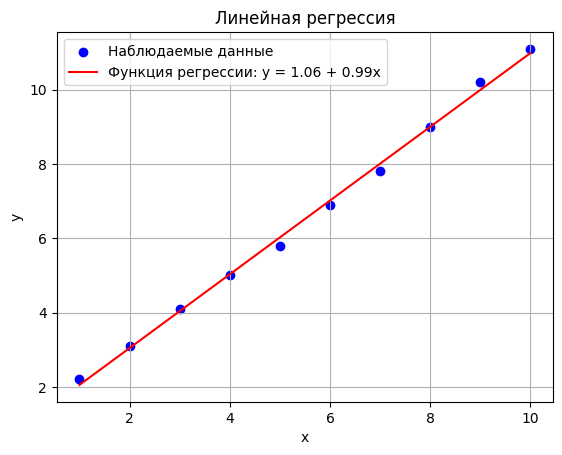

In [5]:
# Задание 4: Построение графика
plt.scatter(x, y, label="Наблюдаемые данные", color="blue")
plt.plot(x, f_x, label=f"Функция регрессии: y = {b0:.2f} + {b1:.2f}x", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия")
plt.legend()
plt.grid(True)
plt.show()

#### Задание 5

In [6]:
# Задание 5: Заключение
print("\nЗадача 5: Заключение")
if F_calculated < F_critical:
    print("Уравнение регрессии подходит для дальнейшего использования.")
else:
    print("Уравнение регрессии не подходит для дальнейшего использования.")


Задача 5: Заключение
Уравнение регрессии подходит для дальнейшего использования.


#### Дополнительное задание

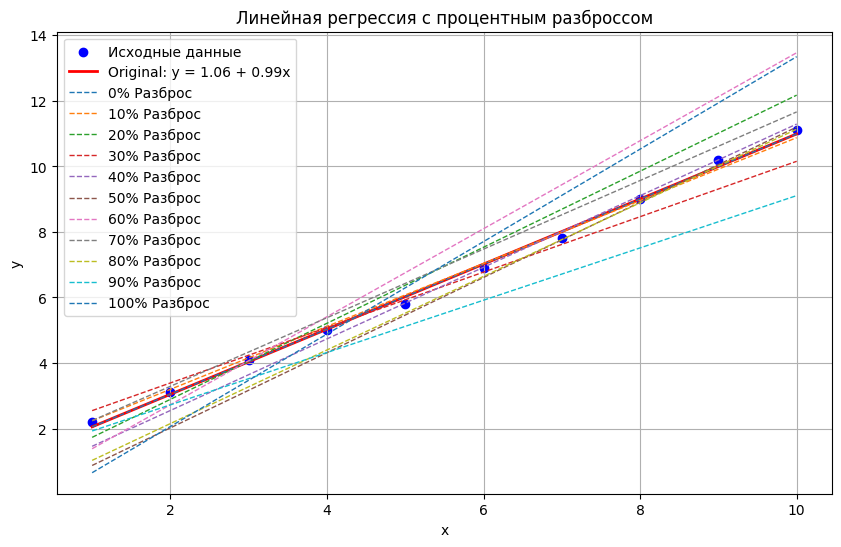

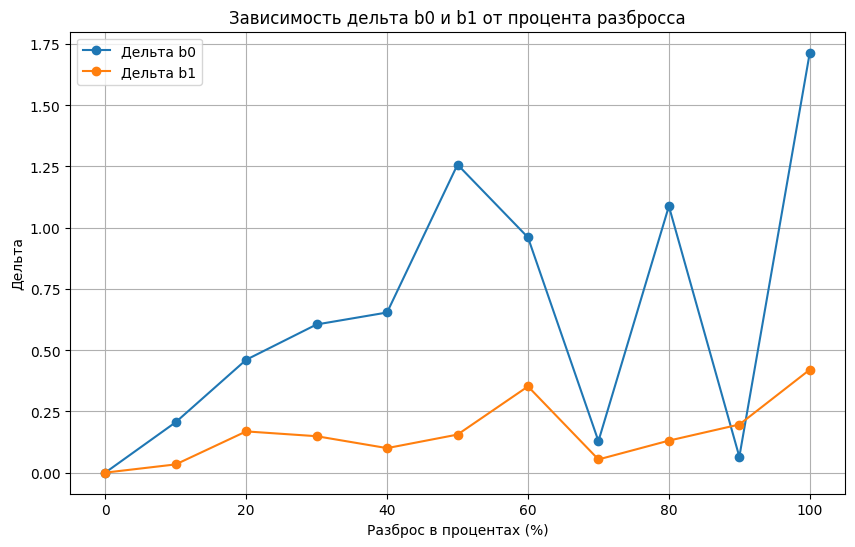

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.2, 3.1, 4.1, 5.0, 5.8, 6.9, 7.8, 9.0, 10.2, 11.1])

# Функция для вычисления коэффициентов b0 и b1
def calculate_b0_b1(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    
    b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b0 = (sum_y - b1 * sum_x) / n
    return b0, b1

# Вычисляем исходные b0 и b1
b0_orig, b1_orig = calculate_b0_b1(x, y)

# Диапазон процентов для разброса
percent_spreads = range(0, 101, 10)  # От 0% до 100% с шагом 10%
# percent_spreads = [20, 30, 40]

# Списки для хранения изменений коэффициентов
delta_b0 = []
delta_b1 = []

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Исходные данные", color="blue")
plt.plot(x, b0_orig + b1_orig * x, label=f"Original: y = {b0_orig:.2f} + {b1_orig:.2f}x", color="red", linewidth=2)

# Генерация данных с разбросами и расчет новых b0, b1
for spread in percent_spreads:
    y_spread = np.array([yi + np.random.uniform(-yi * spread / 100, yi * spread / 100) for yi in y])  # Добавляем случайный разброс
    b0_new, b1_new = calculate_b0_b1(x, y_spread)  # Вычисляем новые коэффициенты

    # Вычисляем относительные изменения коэффициентов
    delta_b0.append(abs(b0_orig - b0_new) / abs(b0_orig))
    delta_b1.append(abs(b1_orig - b1_new) / abs(b1_orig))

    # Строим линии регрессии для наглядности
    plt.plot(x, b0_new + b1_new * x, label=f"{spread}% Разброс", linestyle="--", linewidth=1)


plt.xlabel("x")
plt.ylabel("y")
plt.title("Линейная регрессия с процентным разброссом")
plt.legend()
plt.grid(True)
plt.show()

# Построение графиков изменений delta_b0 и delta_b1
plt.figure(figsize=(10, 6))
plt.plot(percent_spreads, delta_b0, label="Дельта b0", marker='o')
plt.plot(percent_spreads, delta_b1, label="Дельта b1", marker='o')

plt.xlabel("Разброс в процентах (%)")
plt.ylabel("Дельта")
plt.title("Зависимость дельта b0 и b1 от процента разбросса")
plt.legend()
plt.grid(True)
plt.show()
